In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, date
import os
import matplotlib.pyplot as plt

print(os.listdir("../input"))

['final-bought-dataset.csv']


In [2]:
bought_df = pd.read_csv('../input/final-bought-dataset.csv')
bought_df.head()

session       item  total_time    ...      l_click  item_pop  purchased
0       11  214717089         784    ...            0      0.27          0
1       11  214743335         784    ...            0      0.07          0
2       11  214563337         784    ...            0      0.02          0
3       11  214819762         784    ...            1      0.13          0
4       11  214826837         784    ...            0      0.26          0

[5 rows x 17 columns]

In [3]:
len(bought_df), len(bought_df[bought_df['purchased']==1]), len(bought_df[bought_df['purchased']==0])

(2314687, 1049817, 1264870)

In [4]:
df = pd.DataFrame(bought_df)

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(['purchased'], axis=1)
y = df[['purchased']]
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.30)
X_test, X_validate, y_test, y_validate  = train_test_split(X_test_val, y_test_val, test_size=0.50)
X_train.shape, X_validate.shape, X_test.shape, y_train.shape, y_validate.shape, y_test.shape

((1620280, 16),
 (347204, 16),
 (347203, 16),
 (1620280, 1),
 (347204, 1),
 (347203, 1))

In [6]:
## GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train.values.ravel())

y_pred = model.predict(X_validate)

In [7]:
from sklearn.metrics import roc_curve, auc, accuracy_score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true=y_validate, y_score=y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

print("Validation set metrics:-")
print("roc_auc", roc_auc)
print("accuracy_score", accuracy_score(y_pred, y_validate))

Validation set metrics:-
roc_auc 0.7754640522883838
accuracy_score 0.7776494510431907


In [8]:
y_pred = model.predict(X_test)

Test data metrics:-


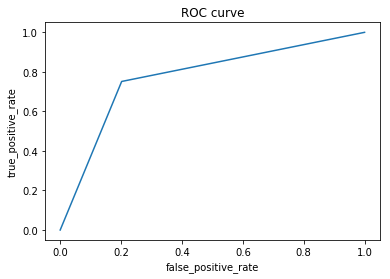

roc_auc 0.774755810379415
accuracy_score 0.7768884485445114


In [9]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true=y_test.values.ravel(), y_score=y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

print("Test data metrics:-")
plt.title("ROC curve")
plt.xlabel("false_positive_rate")
plt.ylabel("true_positive_rate")
plt.plot(false_positive_rate,true_positive_rate)

plt.show() 
print("roc_auc", roc_auc)
print("accuracy_score", accuracy_score(y_pred, y_test))

In [10]:
y_pred = pd.DataFrame(y_pred, index=y_test.index, columns=['purchased'])
what_to_buy_df = pd.merge(X_test, y_pred, left_index=True, right_index=True)
what_to_buy_df.head(3)

session       item    ...      item_pop  purchased
1439565   7329644  214821022    ...          0.18          0
1057783   5454491  214846447    ...          0.46          1
2144063  10754552  214558397    ...          0.16          0

[3 rows x 17 columns]

In [11]:
unique_sid = what_to_buy_df['session'].unique()

fp = open("solution.dat","w")

for sid in unique_sid:
#     all_items = what_to_buy_df['session'==sid , 'item']
    bought_items = what_to_buy_df.loc[(what_to_buy_df['session']==sid) & (what_to_buy_df['purchased']==1), 'item'].values
    if len(bought_items)>0:
        items = ','.join(map(str, bought_items))
        print(f"{sid};{items}") 
        
        print(f"{sid};{','.join(map(str, bought_items))}", file=fp) 

        
fp.close()


7329644;214850743,214850936
5454491;214846447
6399471;214849252
9492443;214853726
11254728;214510449
8487263;214716671
178216;214835405
1632273;214706443,214835000
8327801;214839596
4859769;214836855
1095174;214512425
4123469;214684702
715886;214821369
8421683;214844342
1612871;214629264,214680371
5281688;214845412,214844396
4805021;214821309
692296;214658842
5814658;214844372,214846447,214849001
1350303;214744427,214547814
3029532;214831948
10605947;214854354,214853244
6637079;214678016
2705376;214657652
3330239;214836851
9384393;214687475
412873;214744530
11501104;214854264
5879836;214552202
9885623;214856827
11305374;214858843
10121217;214851714,214853677
19219;214826835
2668044;214829878
1854146;214820392
3760184;214836924
4091839;214839892
277341;214820400,214819762
5273603;214820233
9122353;214851326
3797413;214835167
11093878;214855016
5711439;214839339
9681327;214853422,214853454
8623204;214835537,214848926,214509401
6932252;214848997
138314;214833800
8927711;214853169
5849236;

In [12]:
# A sample session id with what to buy and not buy
what_to_buy_df[what_to_buy_df['session']==11]

Empty DataFrame
Columns: [session, item, total_time, avg.time_clicks, max_time, n_clicks, avg_pop_score, no_of_categories, item_time, dow_first, dow_last, item_clicks, duration_f_l, f_click, l_click, item_pop, purchased]
Index: []